<a href="https://www.kaggle.com/code/azminetoushikwasi/lionel-messi-extended-eda-goals?scriptVersionId=96386605" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# LM10 - Extensive EDA & Analytics - Lionel Messi - All Club Goals Stats

# 1. Introduction

**Lionel Andrés Messi**, also known as Leo Messi, is an Argentine professional footballer who plays as a forward for Ligue 1 club Paris Saint-Germain and captains the Argentina national team. 

- Born: June 24, 1987 (age 34 years), Rosario, Argentina
- Height: 1.69 m
- Spouse: Antonela Roccuzzo (m. 2017)
- Salary: 41 million USD (2022)
- Current teams: Paris Saint-Germain F.C. (#30 / Forward), Argentina national football team (#10 / Forward)
- Children: Mateo Messi Roccuzzo, Thiago Messi Roccuzzo, Ciro Messi Roccuzzo
- Awards: European Golden Shoe, FIFA World Player of the Year, MORE

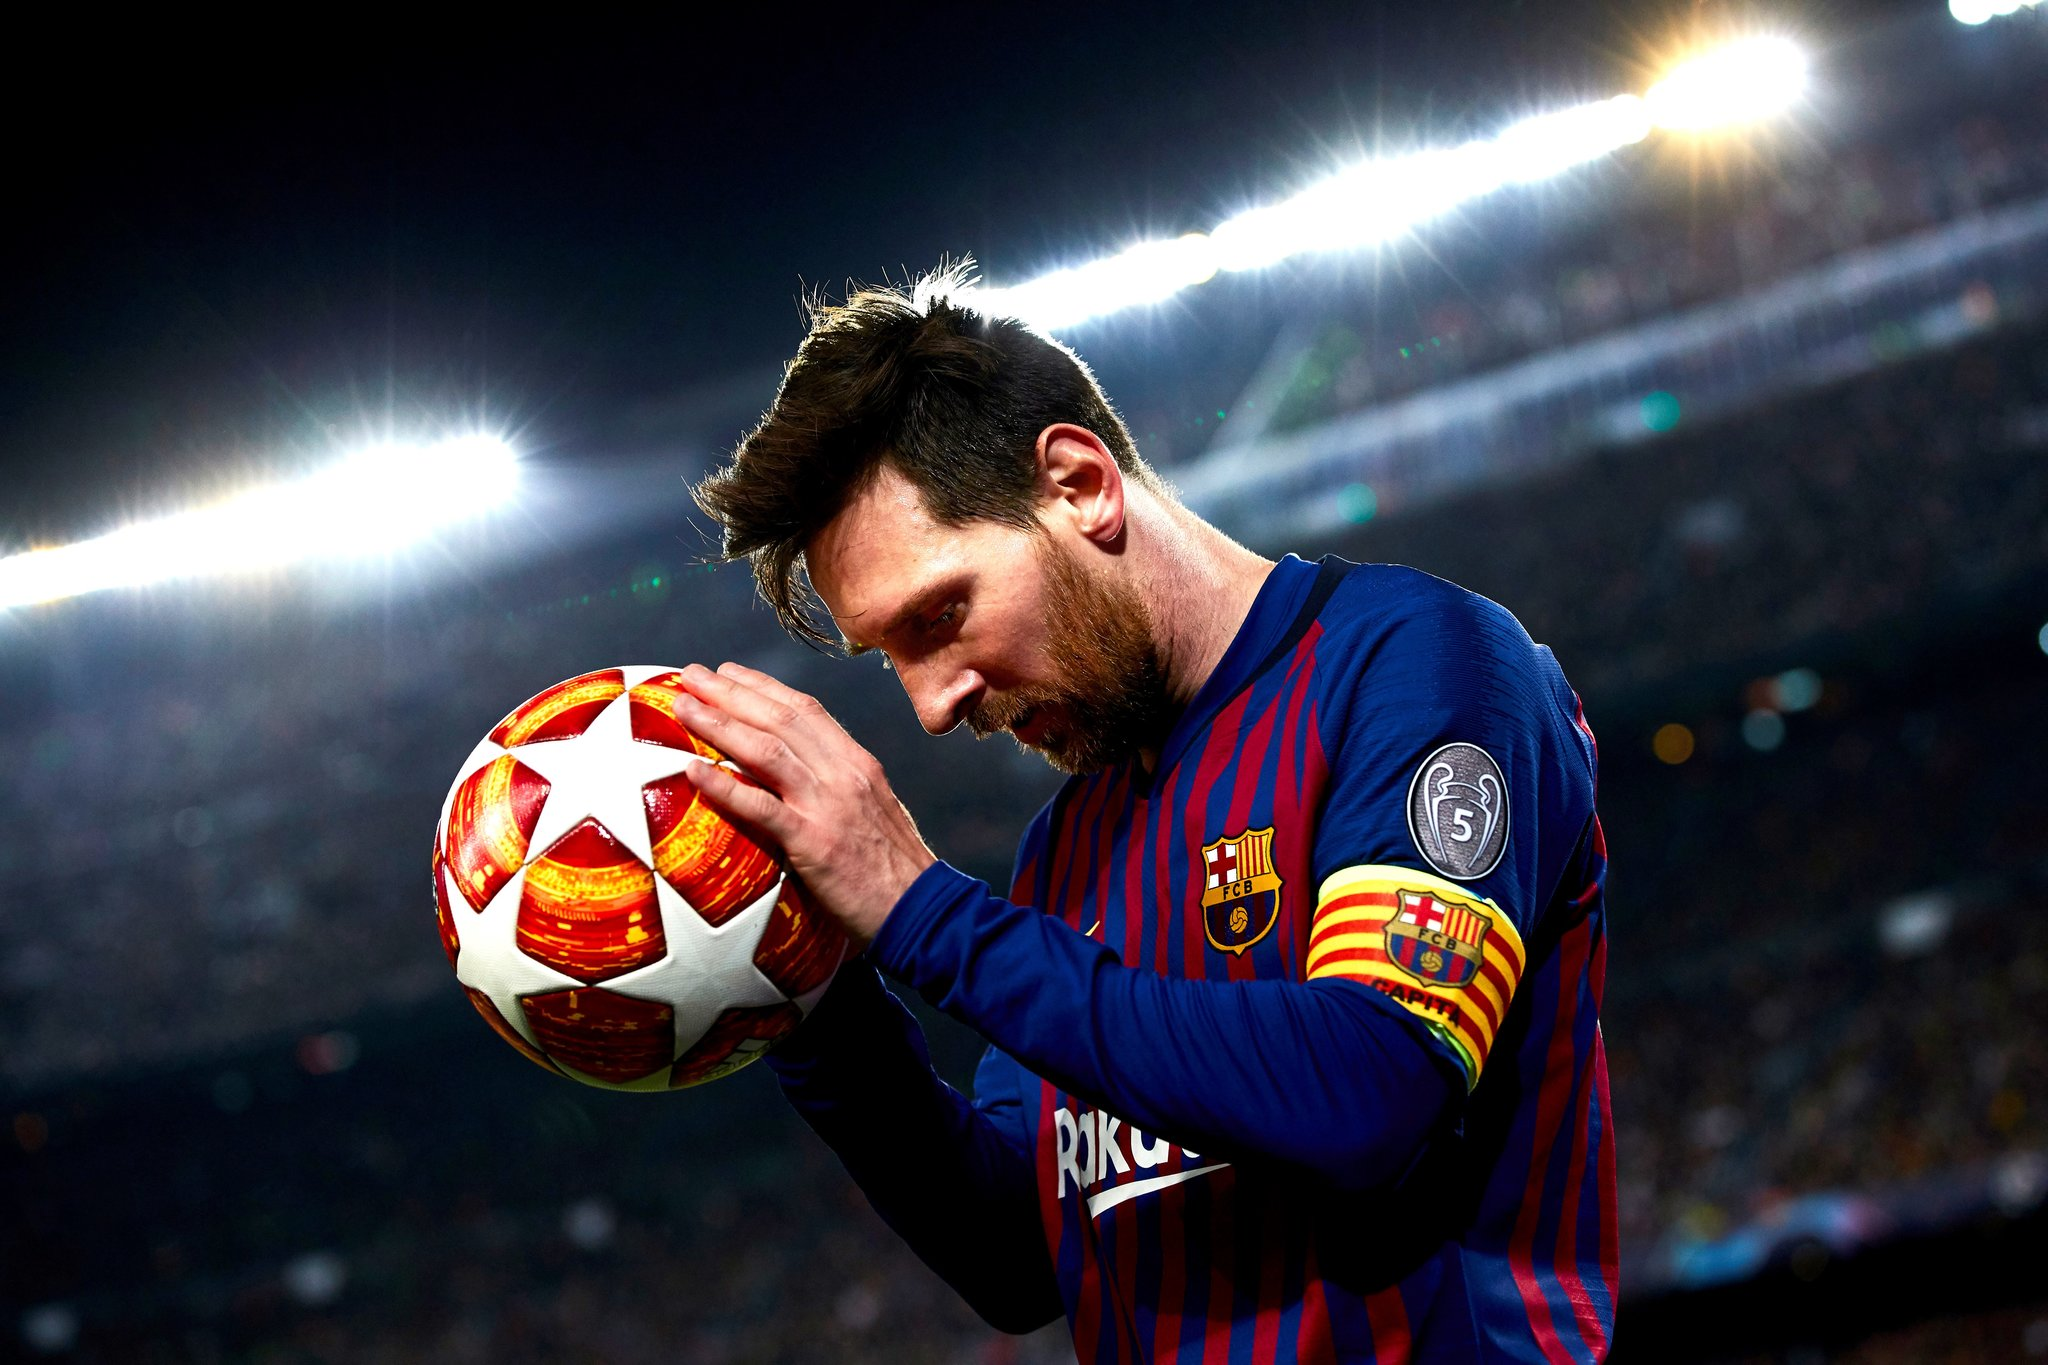

# 2. Data, Modules Loading and Config

# 2.1. Moduules Loading

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from sklearn.linear_model import LinearRegression

# 2.2. Config

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

/kaggle/input/-lionel-messi-all-club-goals/data.csv
/kaggle/input/-lionel-messi-all-club-goals/overall.csv


# 2.3. Data Loading

In [3]:
df=pd.read_csv("/kaggle/input/-lionel-messi-all-club-goals/data.csv")
df_o=pd.read_csv("/kaggle/input/-lionel-messi-all-club-goals/overall.csv")

# Basic Exploration

In [4]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,5/1/05,H,FC Barcelona,Albacete Balompie,2:0,CF,90+1,2:0,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11/2/05,H,FC Barcelona,Panathinaikos Athens,5:0,RW,34,3:0,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:1,RW,51,2:0,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:1,RW,50,2:1,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:0,CF,82,2:0,Left-footed shot,Ronaldinho Gaacho


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            683 non-null    object
 1   Competition       683 non-null    object
 2   Matchday          683 non-null    object
 3   Date              683 non-null    object
 4   Venue             683 non-null    object
 5   Club              683 non-null    object
 6   Opponent          683 non-null    object
 7   Result            683 non-null    object
 8   Playing_Position  683 non-null    object
 9   Minute            683 non-null    object
 10  At_score          683 non-null    object
 11  Type              682 non-null    object
 12  Goal_assist       474 non-null    object
dtypes: object(13)
memory usage: 69.5+ KB


In [6]:
df.describe(include=['object']).T

,count,unique,top,freq
Season,683,18,11/12,73
Competition,683,7,LaLiga,474
Matchday,683,48,Group Stage,76
Date,683,439,3/7/12,5
Venue,683,2,H,410
Club,683,2,FC Barcelona,672
Opponent,683,88,Sevilla FC,38
Result,683,46,4:0,45
Playing_Position,683,9,CF,266
Minute,683,96,55,13


# 4. Exploritory Data Analysis of club Goals

## 4.1. Goals per competition

Text(0.5, 1.0, 'Goals per competition')

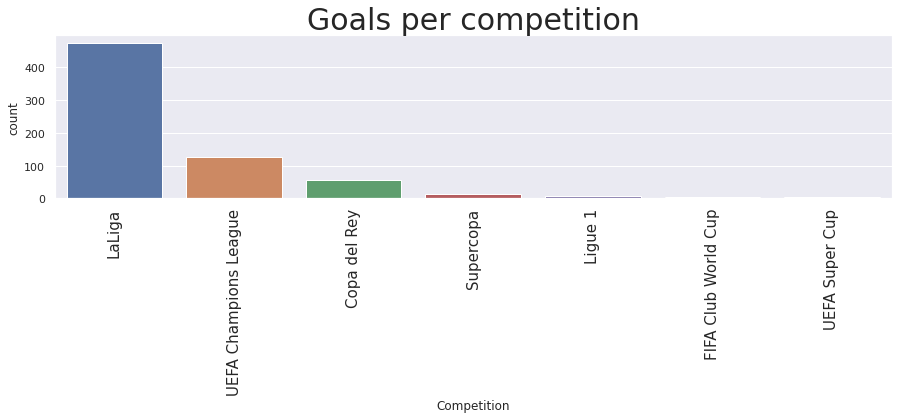

In [7]:
sns.set(rc={'figure.figsize':(15,3)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Competition'],order=df.Competition.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per competition",fontsize=30)

## 4.2. Goals per season

Text(0.5, 1.0, 'Goals per season')

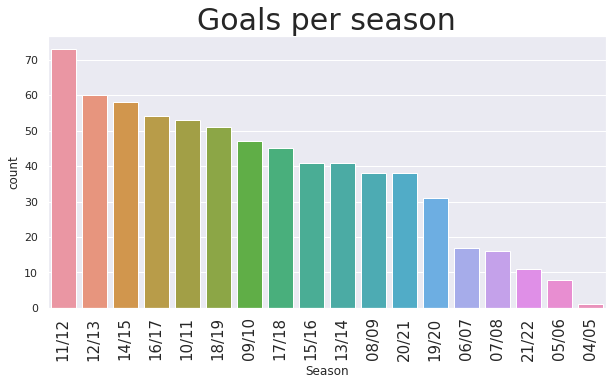

In [8]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Season'],hue_order=df.groupby('Competition'),order=df.Season.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per season",fontsize=30)

## 4.3. Goals per Clubs

<AxesSubplot:title={'center':'Goals per Clubs Played'}, ylabel='Club'>

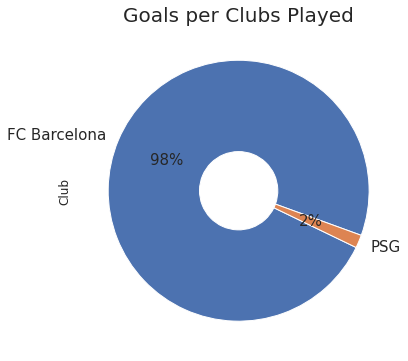

In [9]:
plt.figure(figsize=(6,6))
plt.title('Goals per Clubs Played', fontsize=20)
df.Club.value_counts().plot(kind='pie', labels=['FC Barcelona', 'PSG'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

## 4.4. Goals per playing Position

Text(0.5, 1.0, 'Goals per Playing Position')

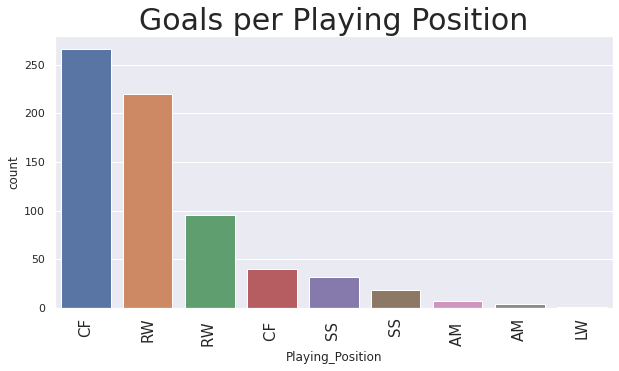

In [10]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Playing_Position'],hue_order=df.groupby('Competition'),order=df.Playing_Position.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Playing Position",fontsize=30)

## 4.5. Goals per Game Minute

In [11]:
mins=list(map(str, range(1,120)))
for min in df['Minute']:
    if min not in mins:
        mins.append(min)
mins1=mins[:int(len(mins)/5)]
mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5=mins[int(4*len(mins)/5):]

Text(0.5, 1.0, 'Goals per Game Minute (1-25)')

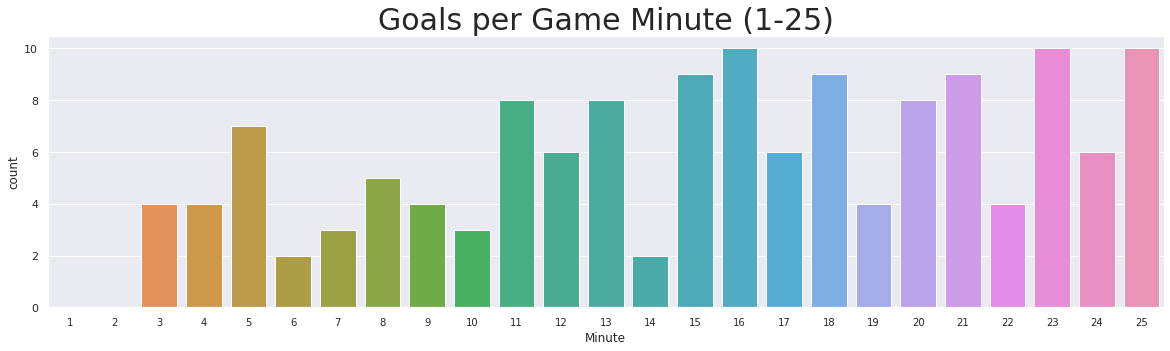

In [12]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
p=sns.countplot(df['Minute'],order=mins1)
p.axes.set_title("Goals per Game Minute (1-25)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (26-50)')

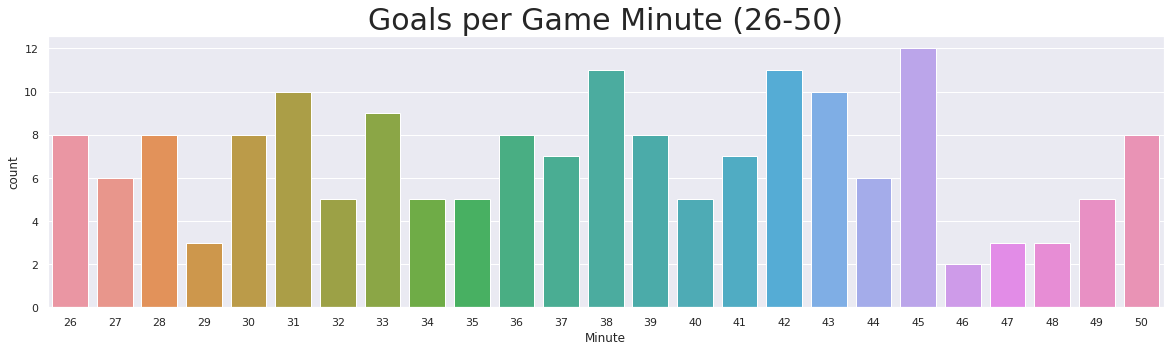

In [13]:
p=sns.countplot(df['Minute'],order=mins2)
p.axes.set_title("Goals per Game Minute (26-50)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (51-75)')

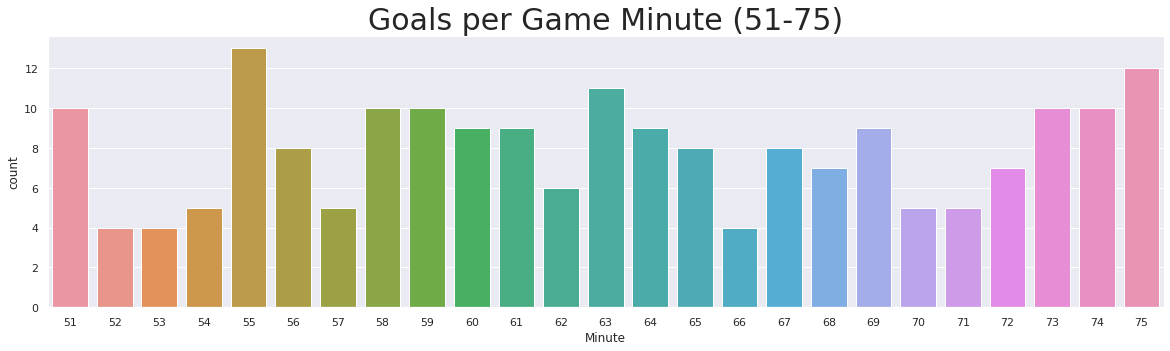

In [14]:
p=sns.countplot(df['Minute'],order=mins3)
p.axes.set_title("Goals per Game Minute (51-75)",fontsize=30)

## 4.6. Goals per Type_of_goal

Text(0.5, 1.0, 'Goals per Type of goal scored')

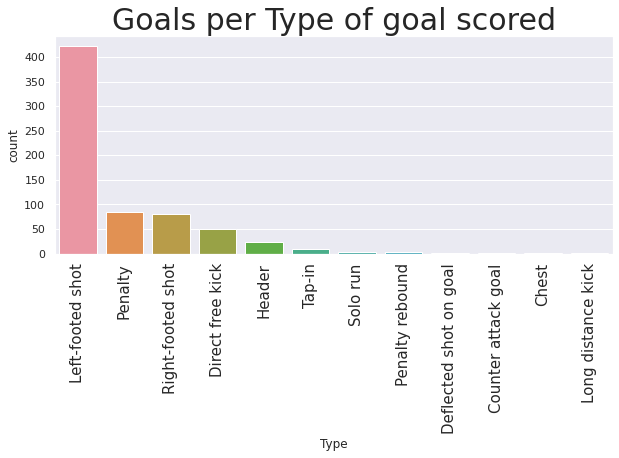

In [15]:
sns.set(rc={'figure.figsize':(10,4)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Type'],hue_order=df.groupby('Competition'),order=df.Type.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Type of goal scored",fontsize=30)

## 4.7. Scoreline after goal

Text(0.5, 1.0, 'Scoresheet after scoring')

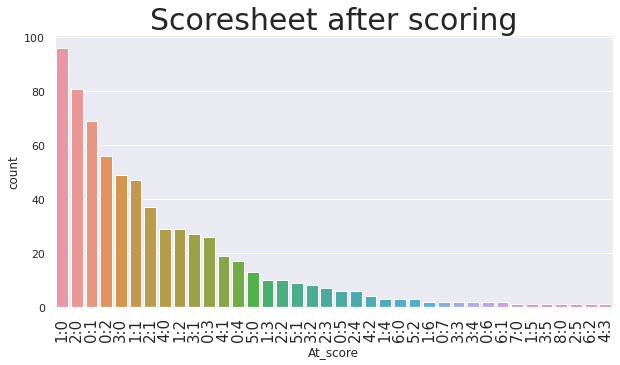

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['At_score'],hue_order=df.groupby('Competition'),order=df.At_score.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Scoresheet after scoring",fontsize=30)

## 4.8. Opponents

Text(0.5, 1.0, 'Goals per Opponent')

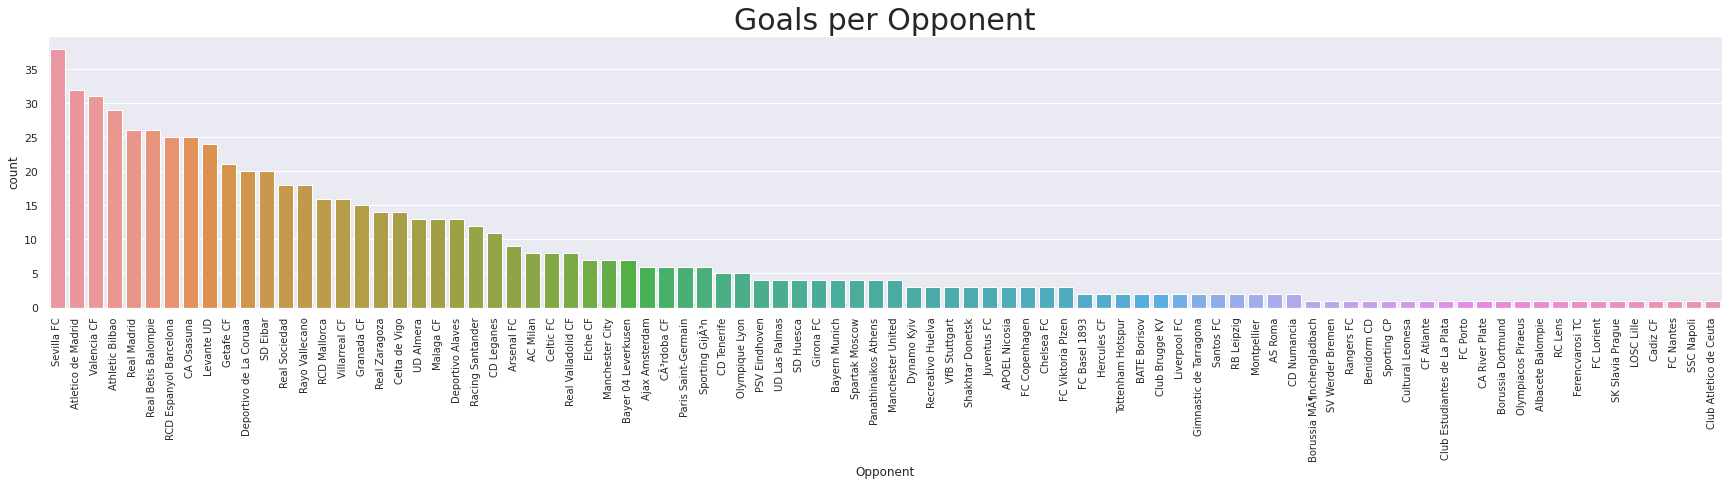

In [17]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Opponent'],hue_order=df.groupby('Competition'),order=df.Opponent.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Opponent",fontsize=30)

## 4.9. Favourite Opponents

<BarContainer object of 16 artists>

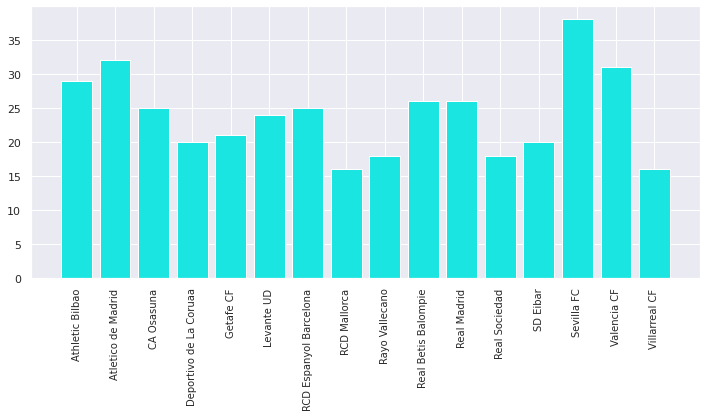

In [18]:
sns.set(rc={'figure.figsize':(12,5)})
opponents_df=df.groupby('Opponent').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=10,rotation='vertical')
plt.bar(x=fav_opponents_df['Opponent'],height=fav_opponents_df['count'],color="#1ae5e1")


## 4.10. Assist

Text(0.5, 1.0, 'Goals Assist')

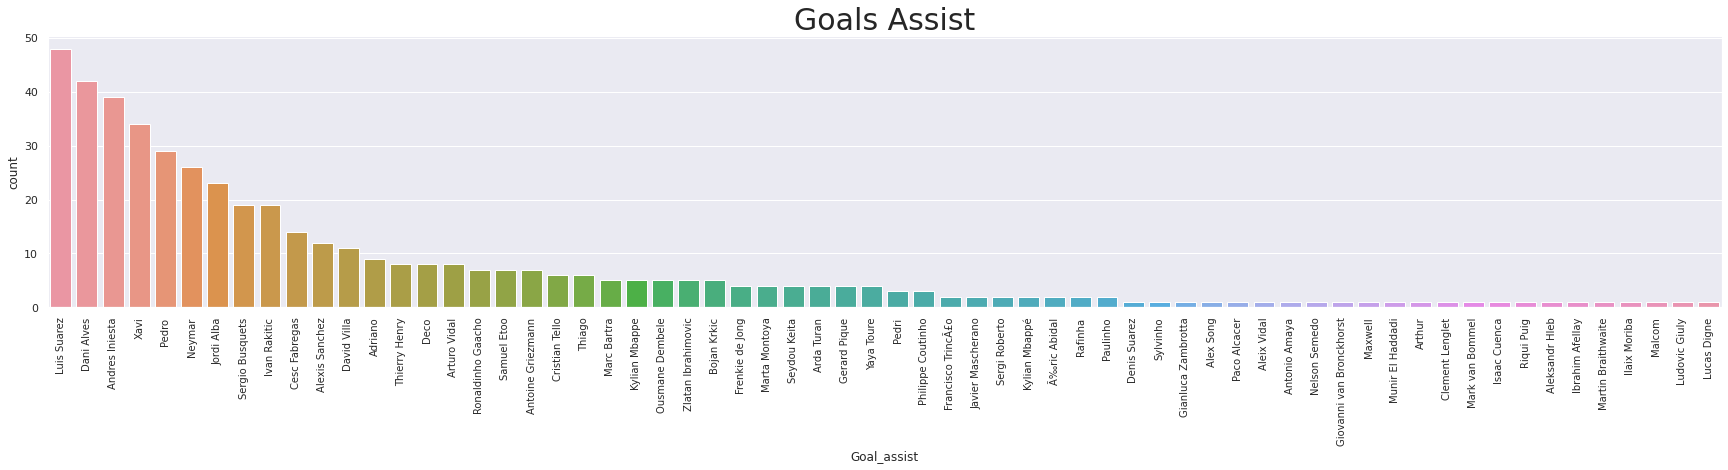

In [19]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=df.Goal_assist.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals Assist",fontsize=30)

## 4.11. Most Assisted by

<BarContainer object of 9 artists>

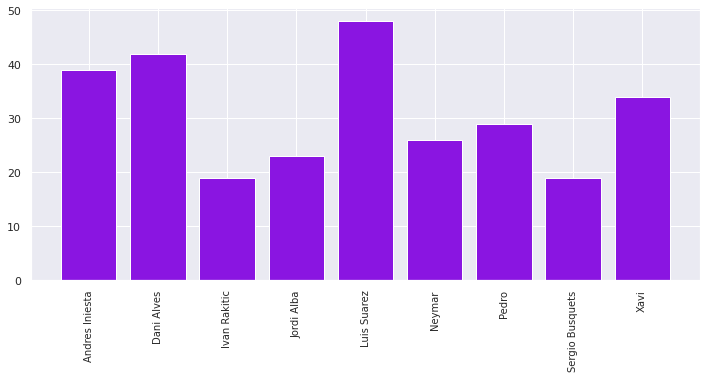

In [20]:
sns.set(rc={'figure.figsize':(12,5)})
opponents_df=df.groupby('Goal_assist').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=10,rotation='vertical')
plt.bar(x=fav_opponents_df['Goal_assist'],height=fav_opponents_df['count'],color="#8a15e1")

## 4.12. Home - Away goals

<AxesSubplot:title={'center':'Goals per venue'}, ylabel='Venue'>

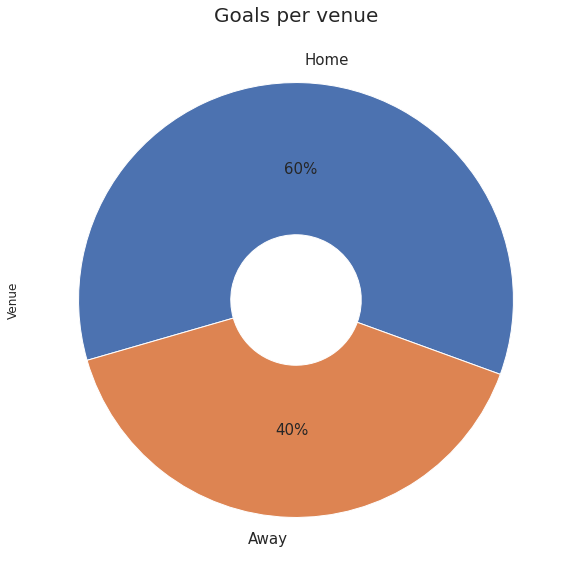

In [21]:
plt.figure(figsize=(30,10))
plt.title('Goals per venue', fontsize=20)
df.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

## 5. Overall Analysis

In [22]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 42.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


                                             |          | [  0%]   00:00 -> (? left)


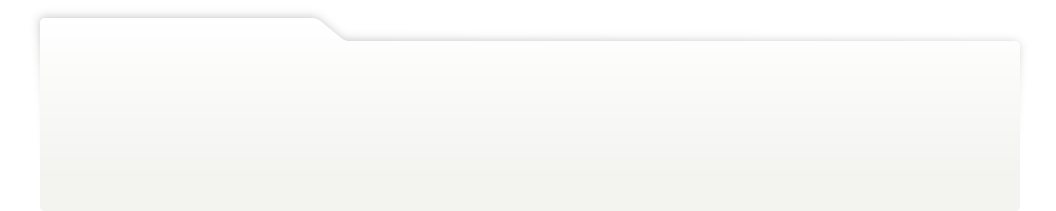
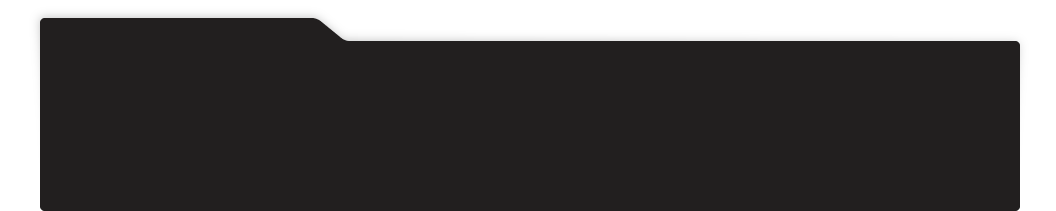
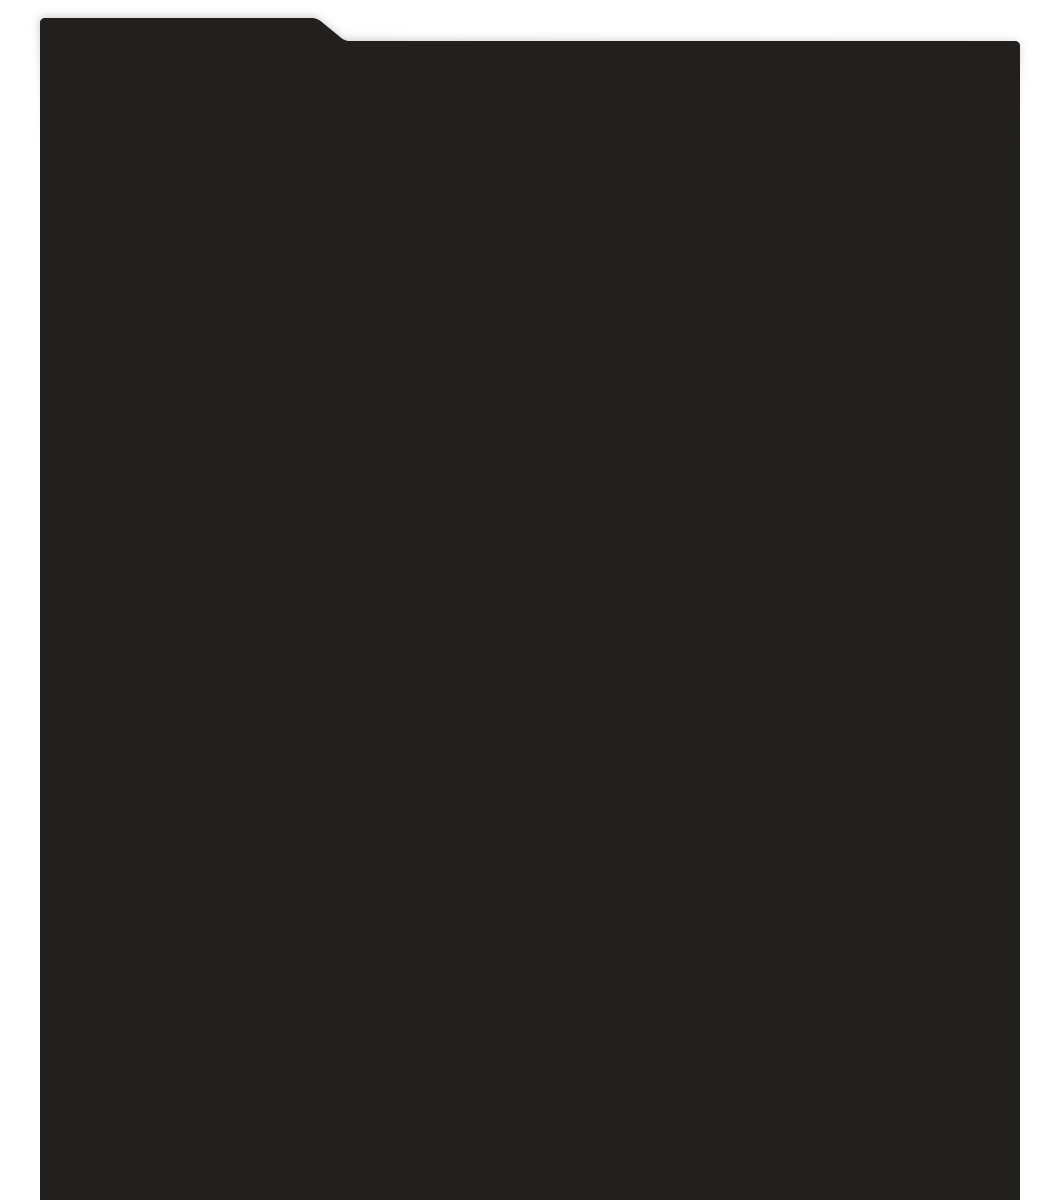
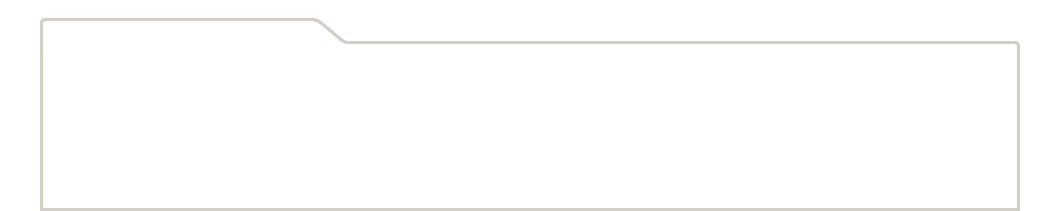
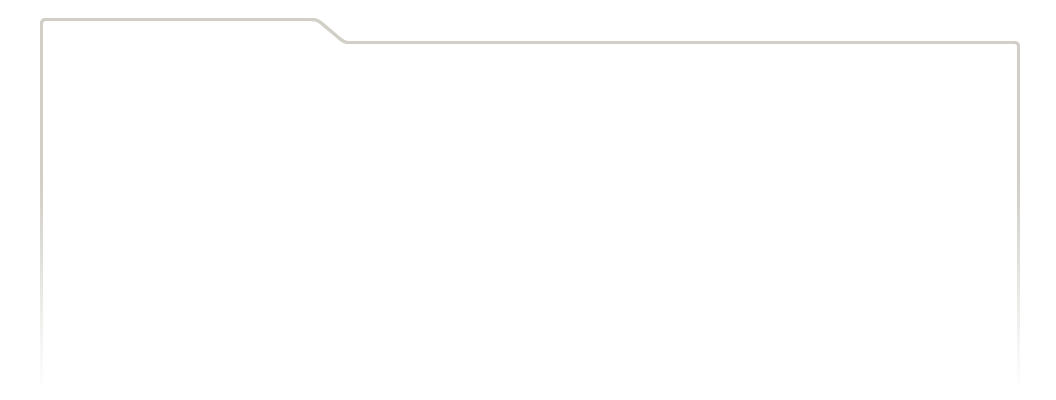
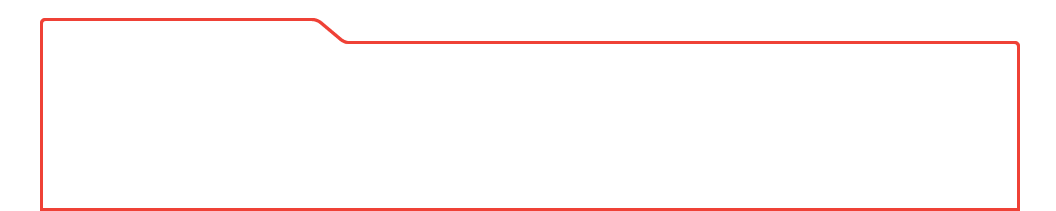
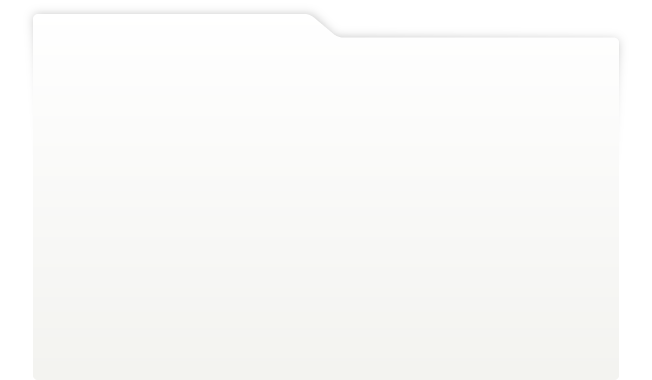
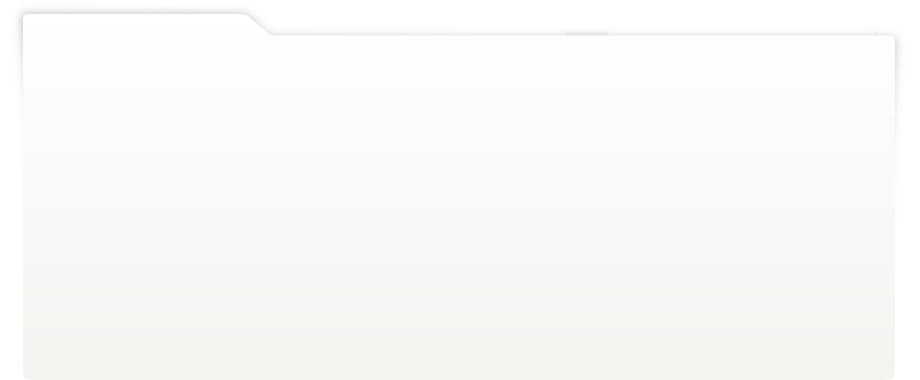
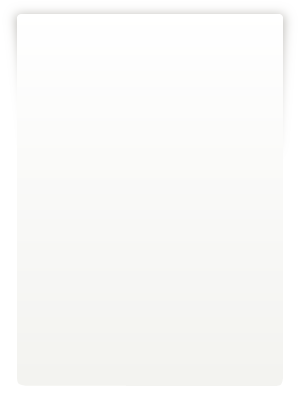
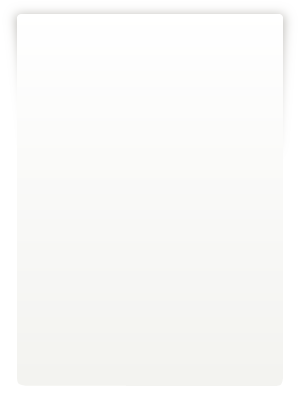
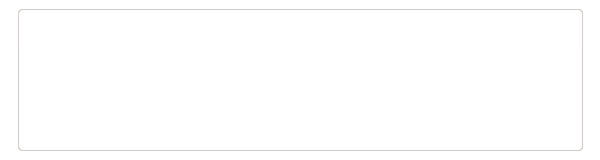
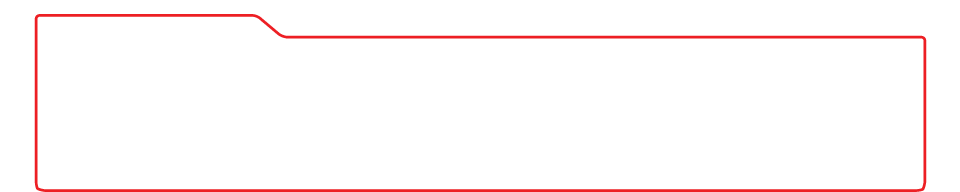
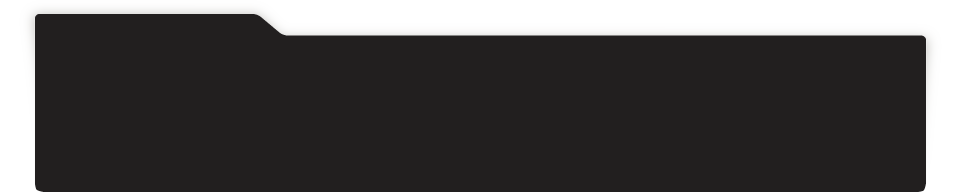
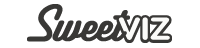
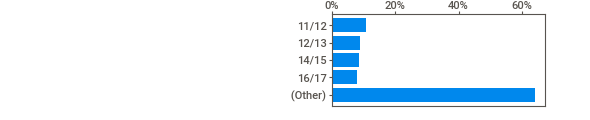
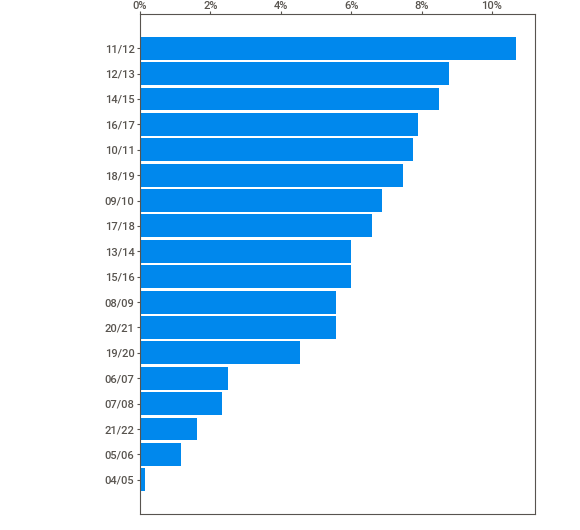
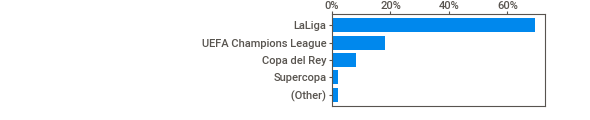
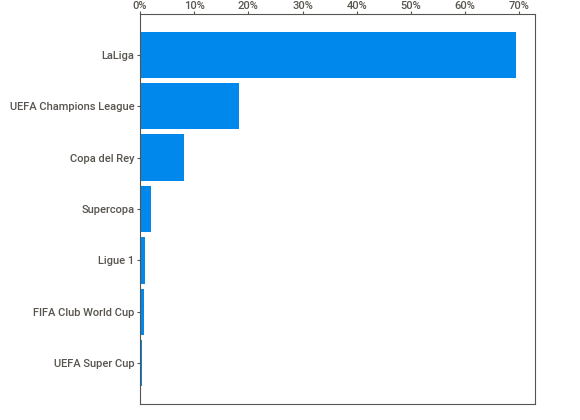
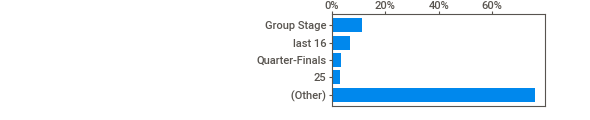
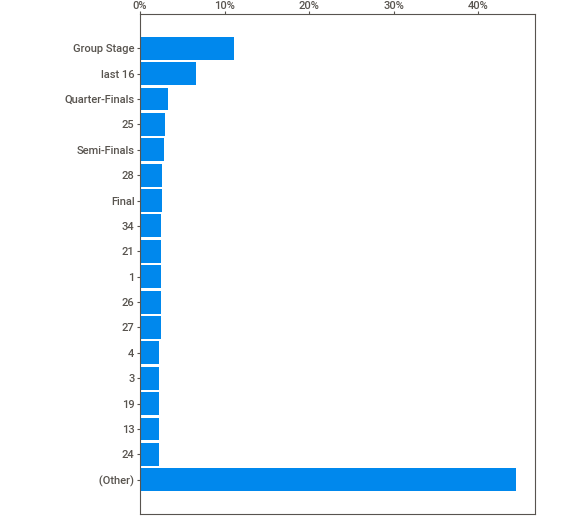
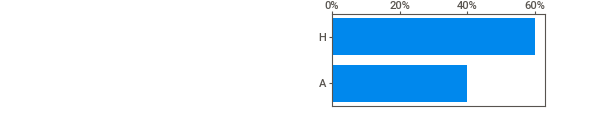
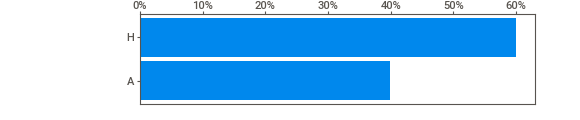
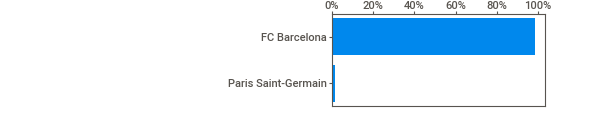
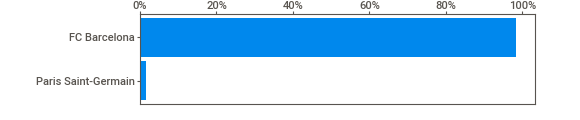
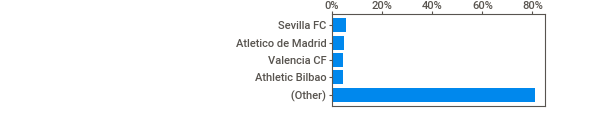
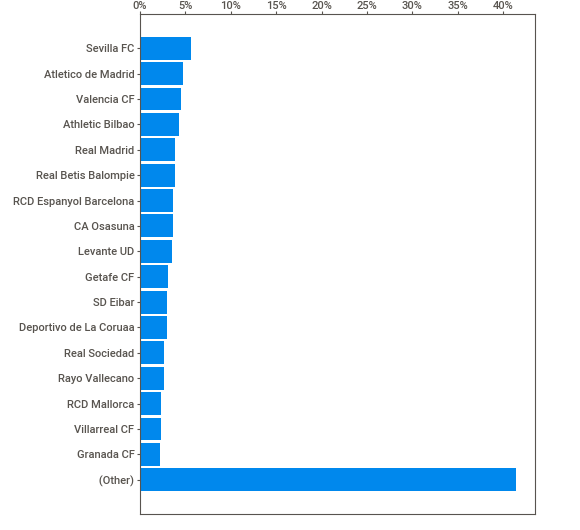
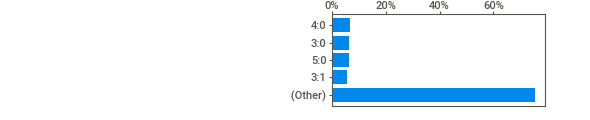
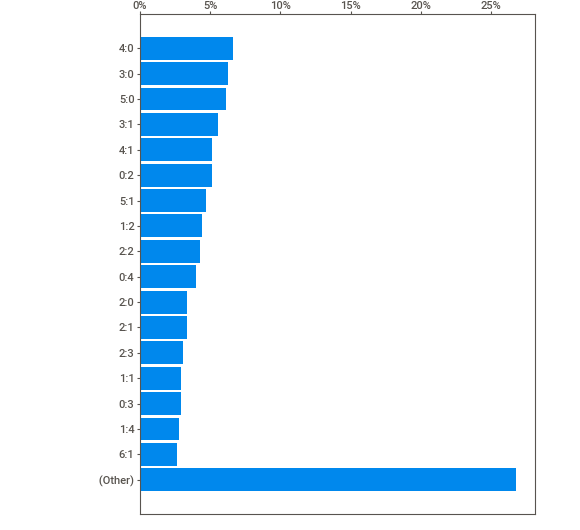
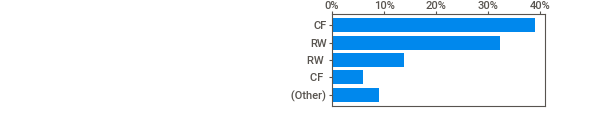
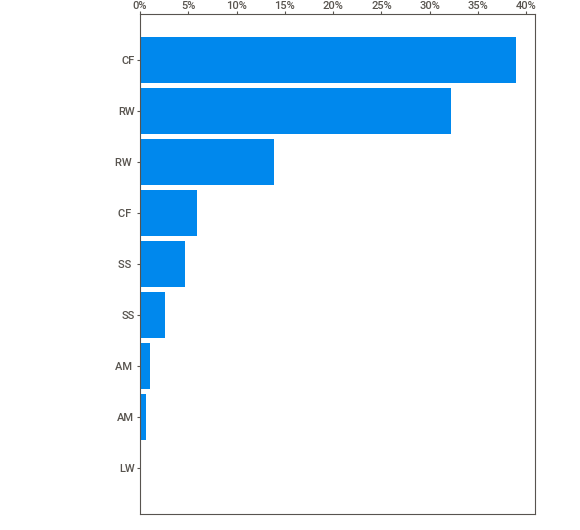
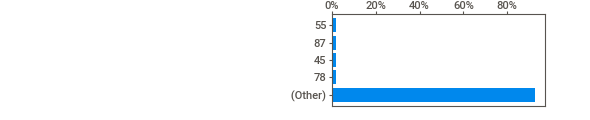
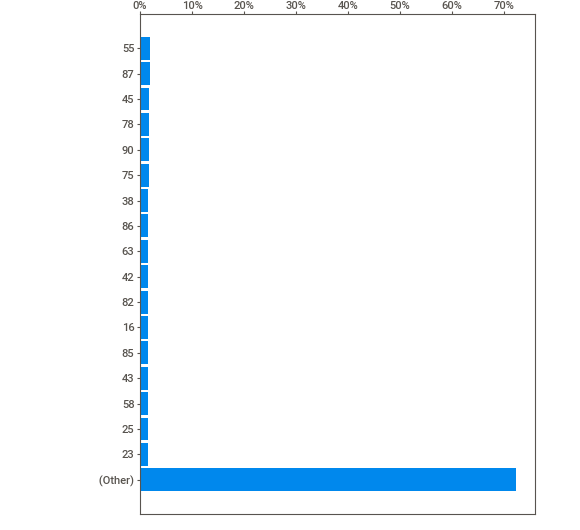
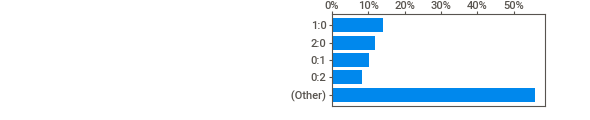
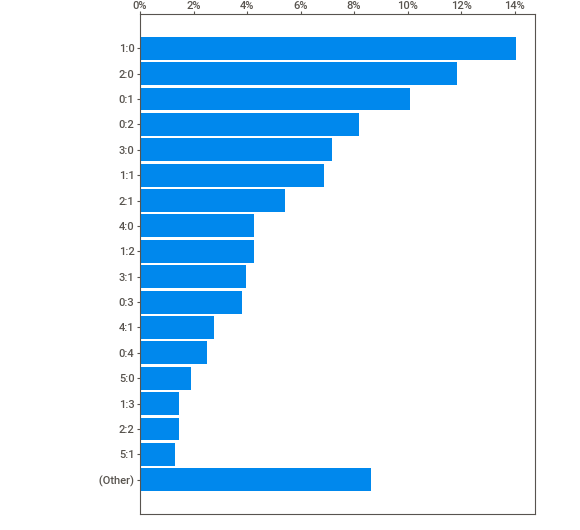
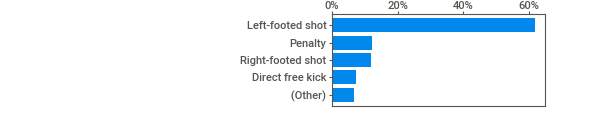
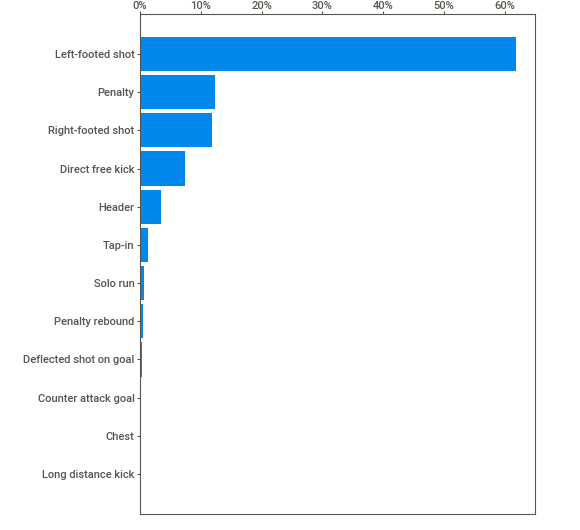
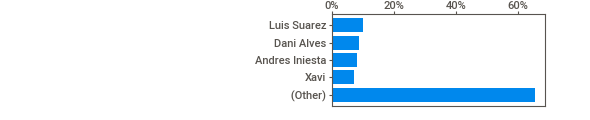
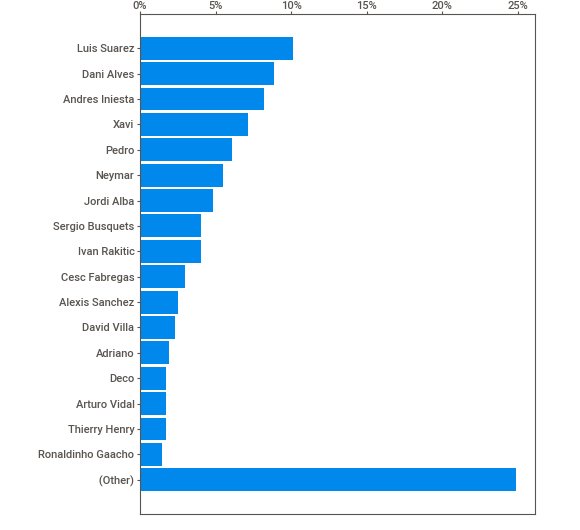
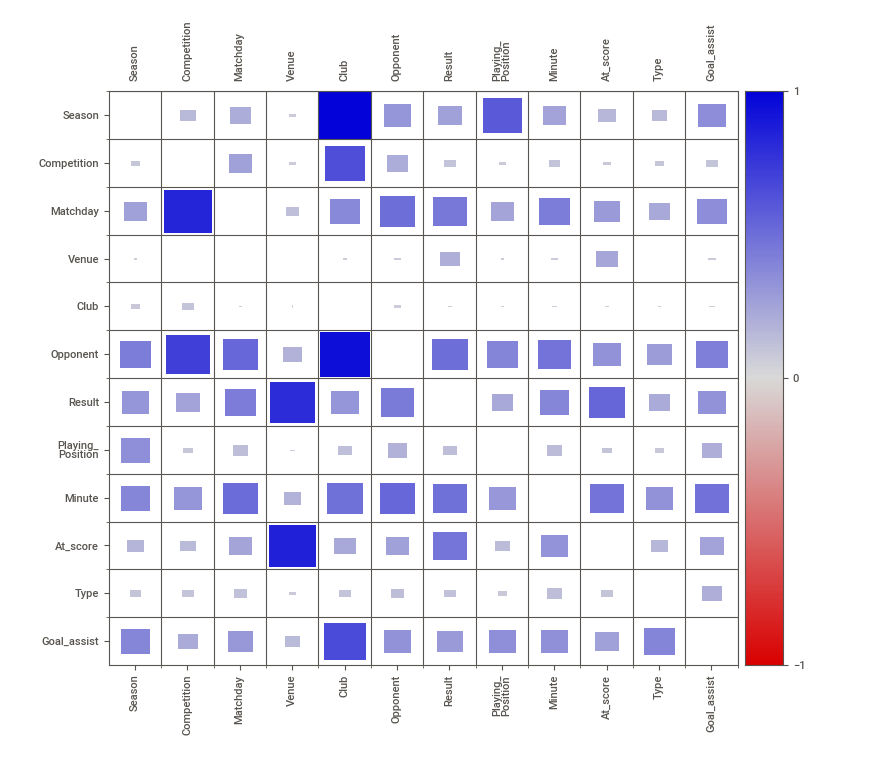
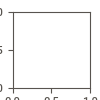

In [23]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_notebook()

# 6. Career Analysis

## 6.1. Career Match Stats

<AxesSubplot:>

<Figure size 2000x1000 with 0 Axes>

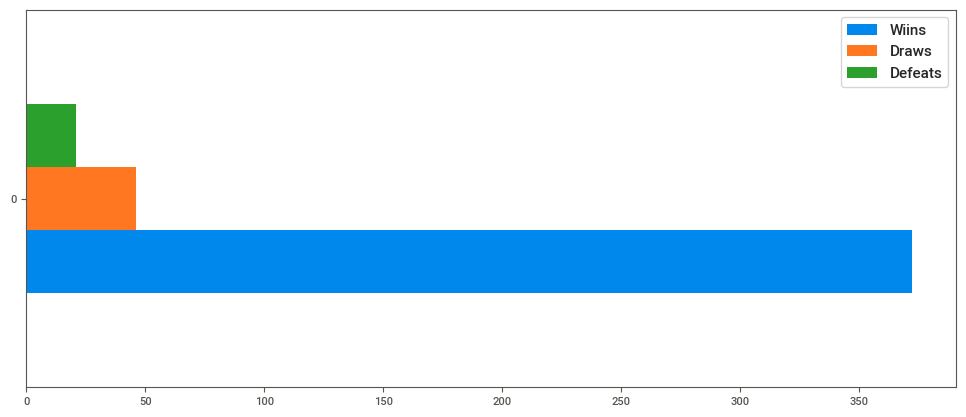

In [24]:
plt.figure(figsize=(20,10))
df_o[["Wiins","Draws","Defeats"]].plot(kind = 'barh')

## 6.2. Career Goals - Match winning goals

<AxesSubplot:>

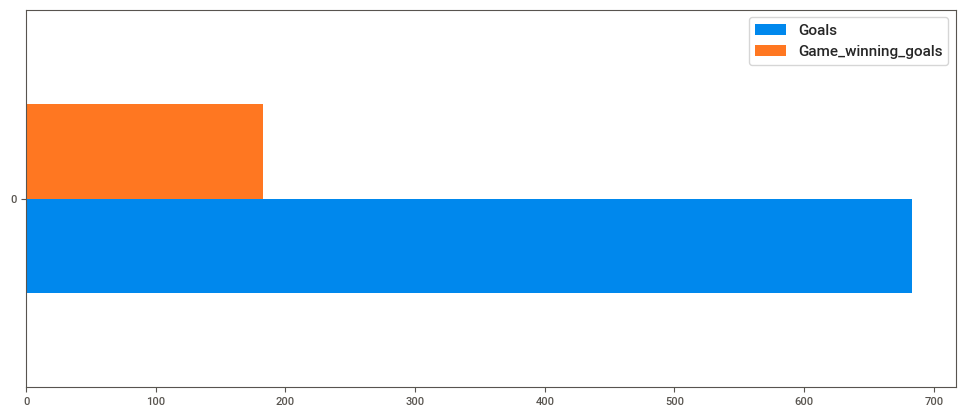

In [25]:
df_o[["Goals","Game_winning_goals"]].plot(kind = 'barh')

# 7. Goal Timeline Analysis

## 7.1. Total Goal Trendline

In [26]:
dfl = df[['Date']]
dfl['Date'] = pd.to_datetime(dfl['Date']).dt.strftime('%y-%m-%d')
dfl['Goal_no']=list(range(1,684,1))

trace1 = go.Scatter(x=dfl.Date,
                    y=dfl.Goal_no,
                    name = "Meesi Total Goals Time graph",
                    line = dict(color = 'blue'),
                    opacity = 0.4)

layout = dict(title='Messi Goals',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

## 7.2. Goals Calender

In [27]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%y-%m-%d')
df_g = df.Date.value_counts().rename_axis('Date').reset_index(name='counts')
df_g=df_g.sort_values(by="Date")
plt.figure(figsize=(10,10))
trace1 = go.Scatter(x=df_g.Date,
                    y=df_g.counts,
                    name = "Messi Total Goals Time graph",
                    line = dict(color = 'red'),
                    opacity = 0.4)

layout = dict(title='Messi Goals',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

<Figure size 1000x1000 with 0 Axes>

## 7.3. Goals per year

In [28]:
df_c = pd.DataFrame(pd.to_datetime(df['Date']).dt.strftime('%y-%m-%d')) 
df_c['year'] = pd.to_datetime(df_c['Date']).dt.strftime('%Y')
df_c['month'] = pd.to_datetime(df_c['Date']).dt.strftime('%m')

In [29]:
df_y = df_c.year.value_counts().rename_axis('Year').reset_index(name='counts')
df_y = df_y.sort_values(by="Year")

plt.figure(figsize=(10,10))
trace1 = go.Scatter(x=df_y.Year,
                    y=df_y.counts,
                    name = "Messi Total Goals Time graph",
                    line = dict(color = 'green'),
                    opacity = 0.8,
                    marker=dict(
                        color='white',
                        size=5
                        ))

layout = dict(title='Messi Goals - per month',)

fig = dict(data=[trace1], layout=layout)

iplot(fig)

<Figure size 1000x1000 with 0 Axes>

In [30]:
df_m = df_c.month.value_counts().rename_axis('Month').reset_index(name='counts')
df_m = df_m.sort_values(by="Month")

plt.figure(figsize=(10,10))
trace2 = go.Scatter(x=df_m.Month,
                    y=df_m.counts,
                    name = "Messi Total Goals Time graph",
                    line = dict(color = 'red'),
                    opacity = 0.4,
                    marker=dict(
                        color='white',
                        size=10,
                        line=dict(
                            width=12
                        )))

layout2 = dict(title='Messi Goals - per month',)

fig2 = dict(data=[trace2], layout=layout2)

iplot(fig2)

<Figure size 1000x1000 with 0 Axes>

# Fork, Upvote, Share,Support